In [47]:
#Importing Libraries
import re #re to apply regular expression
import numpy as np #For mathematical Operations
import pandas as pd #Pandas to work with DataFrames
import string #For Performing String Operations(For Punctuations)


#For Natural Language Operations
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt #For Creating Plots
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS #For creating Wordclouds

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
#Mounting into Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#Reading data from the book text file
book = open("/content/drive/MyDrive/NLP/BE Book.txt","r",encoding='utf-8', errors='ignore')
word_list = book.read().splitlines()

#Determining no. of words and characters in book
print(f"No. of Words: {len(word_tokenize(' '.join(word_list)))}")
print(f"No. of Characters: {len(' '.join(word_tokenize(' '.join(word_list))))}")

#Adding Space at end of the string so that when it is merged 
word_list = [i+" " for i in word_list if i!='']
print(f"No. of Lines: {len(word_list)}")

print("\nPrinting only first 40 lines\n")
word_list[:40]

No. of Words: 231291
No. of Characters: 1146764
No. of Lines: 20893

Printing only first 40 lines



[' Digital Design ',
 'With an Introduction to the Verilog HDL ',
 'This page intentionally left blank ',
 '          Digital Design ',
 '                      With an Introduction to the Verilog HDL ',
 '                                                 FIFTH EDITION ',
 '                           M. Morris Mano ',
 '                            Emeritus Professor of Computer Engineering ',
 '                                  California State University, Los Angeles ',
 '                         Michael D. Ciletti ',
 '          Emeritus Professor of Electrical and Computer Engineering ',
 '                             University of Colorado at Colorado Springs ',
 '                      Upper Saddle River Boston Columbus San Franciso New York ',
 '                 Indianapolis London Toronto Sydney Singapore Tokyo Montreal ',
 'Dubai Madrid Hong Kong Mexico City Munich Paris Amsterdam Cape Town ',
 'Vice President and Editorial Director, ECS:      Cover Designer: Jayne Conte ',
 '   M

In [50]:
word_list = word_list[451:-1087] #Removing the Preface, Indexes and Answers

In [51]:
#Removing Running Chapter Names from Text
for i in word_list:
    if re.search(r"(^|[0-9]+\s)[cC]hapter\s[0-9]+",i) != None:
        word_list.remove(i)

#Converting List to the text by joining them
word_txt = ""
word_txt = word_txt.join(word_list)


word_txt = re.sub(r"\\", " ", word_txt)
word_txt = re.sub(r"[^0-9\s]*[0-9][^0-9\s]*", "", word_txt)
word_txt = re.sub(r" +", " ", word_txt)
word_txt = re.sub(r"- ", "", word_txt)

word_txt[:2000]

'Digital Systems and Binary Numbers DIGITAL SYSTEMS Digital systems have such a prominent role in everyday life that we refer to the present technological period as the digital age. Digital systems are used in communication, business transactions, traffic control, spacecraft guidance, medical treatment, weather monitoring, the Internet, and many other commercial, industrial, and scientific enterprises. We have digital telephones, digital televisions, digital versatile discs, digital cameras, handheld devices, and, of course, digital computers. We enjoy music downloaded to our portable media player (e.g., iPod Touch) and other handheld devices having high resolution displays. These devices have graphical user interfaces (GUIs), which enable them to execute commands that appear to the user to be simple, but which, in fact, involve precise execution of a sequence of complex internal instructions. Most, if not all, of these devices have a special purpose digital computer embedded within th

In [52]:
#Converting Data to Lower Case and then cleaning it
clean_txt = word_txt.lower()
clean_txt = re.sub("(\n)|(\s)+"," ",clean_txt)   # Removing new line character and multiple spaces

clean_txt = re.sub('[^(a-zA-Z)\s]', ' ', clean_txt)
my_punct = string.punctuation                    
punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")  
clean_txt = re.sub(punct_pattern, " ", clean_txt)                       # Removing all punctuation marks
clean_txt = re.sub("(\s)*[0-9]+(\s)+"," ",clean_txt)                    # Removing all the numbers
clean_txt = re.sub("(\s)[a-z](\s)"," ",clean_txt)                       # Removing single alphabetic characters
clean_txt = re.sub("(\s)+"," ",clean_txt)                               # Removing multiple spaces

In [53]:
clean_txt[:2000]

'digital systems and binary numbers digital systems digital systems have such prominent role in everyday life that we refer to the present technological period as the digital age digital systems are used in communication business transactions traffic control spacecraft guidance medical treatment weather monitoring the internet and many other commercial industrial and scientific enterprises we have digital telephones digital televisions digital versatile discs digital cameras handheld devices and of course digital computers we enjoy music downloaded to our portable media player g ipod touch and other handheld devices having high resolution displays these devices have graphical user interfaces guis which enable them to execute commands that appear to the user to be simple but which in fact involve precise execution of sequence of complex internal instructions most if not all of these devices have special purpose digital computer embedded within them the most striking property of the digi

In [54]:
#Tokenizing the Text
tokens = word_tokenize(clean_txt)

In [55]:
#Determining the frequency of Tokens
dic = {}
for i in tokens:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] += 1

In [56]:
#Forming DataFrame contaning the Tokens, their count and their length
df = pd.DataFrame(list(dic.items()))
df.rename(columns = {0:'Tokens', 1:'Frequency'}, inplace = True)
df["Length_Tokens"] = [len(i) for i in df['Tokens']]
#Sorting DataFrame in order of the Length
df = df.sort_values('Frequency',ascending = False)
df

,Tokens,Frequency,Length_Tokens
16,the,15251,3
49,of,5704,2
2,and,4375,3
15,to,3935,2
99,is,3785,2
...,...,...,...
3617,customers,1,9
3615,wishes,1,6
3614,she,1,3
3613,he,1,2


In [57]:
#Determining the frequency based on Word length
len_df = df.groupby(['Length_Tokens'],as_index=False).sum()
len_df

,Length_Tokens,Frequency
0,1,1574
1,2,27321
2,3,33514
3,4,20727
4,5,17680
5,6,12680
6,7,13266
7,8,9392
8,9,6536
9,10,5295


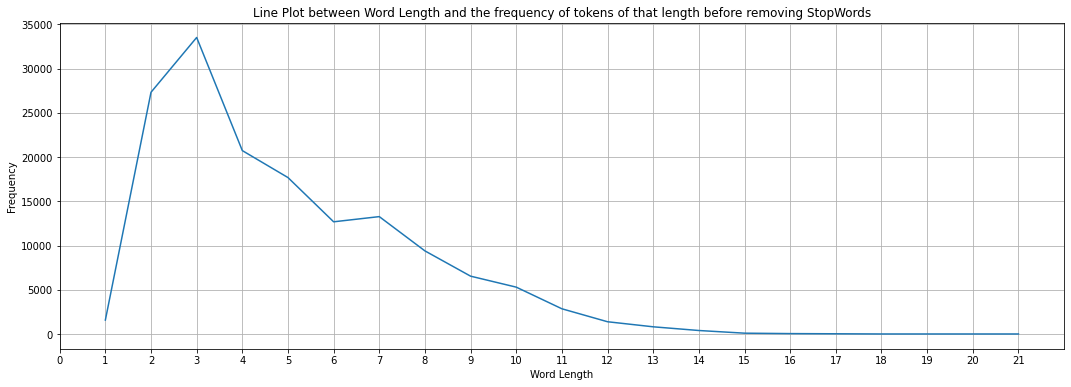

In [58]:
#Plot between Word Length and the frequency of tokens of that length before removing StopWords
plt.figure(figsize=(18,6))
plt.title("Line Plot between Word Length and the frequency of tokens of that length before removing StopWords")
plt.plot(len_df['Length_Tokens'],len_df["Frequency"])
plt.xticks(np.linspace(0,21,22))
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()

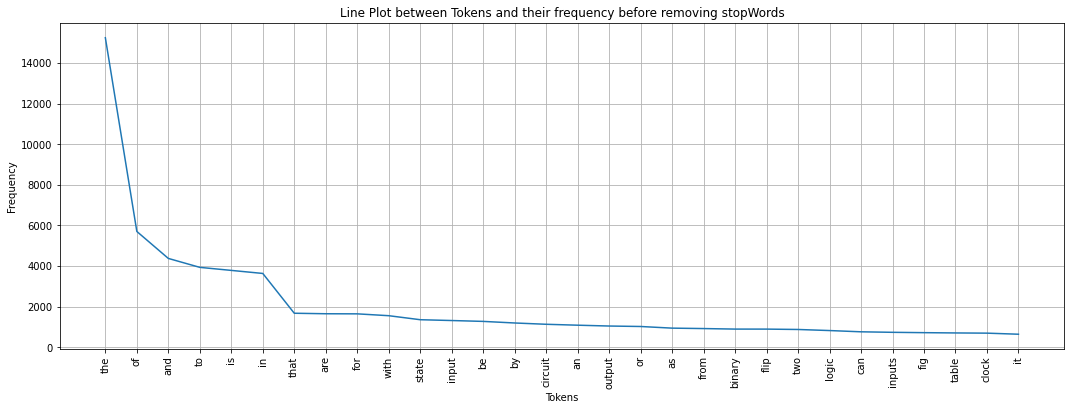

In [59]:
#Plot between Tokens and their frequency before removing stopWords
plt.figure(figsize=(18,6))
plt.title("Line Plot between Tokens and their frequency before removing stopWords")
plt.plot(df['Tokens'].iloc[:30],df['Frequency'].iloc[:30])
plt.xticks(rotation=90)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.show()

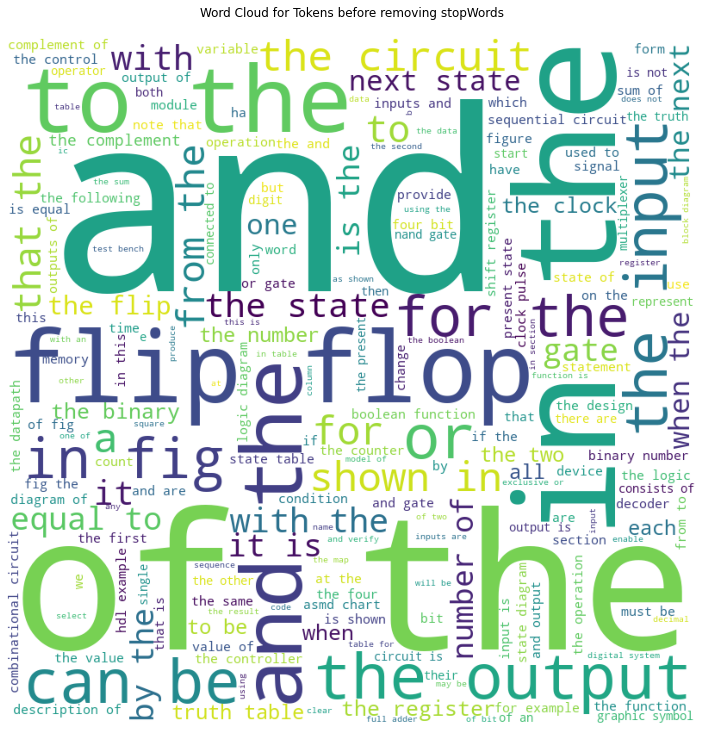

In [60]:
#Creating WordCloud before Removing StopWords
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', stopwords={},
                min_font_size = 10).generate(clean_txt)
                
plt.figure(figsize = (10, 10), facecolor = None)
plt.title("Word Cloud for Tokens before removing stopWords\n")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [61]:
Words_to_add = ["figure","fig","example", "one", "two", "three", "four", "shown", "using", "table", "thus", "section", "first", "use", "may", "eight", "must", "used", 
                "b", "m", "x", "z", "will", "equal"]
for i in Words_to_add:
  STOPWORDS.add(i)

In [62]:
#Removing StopWords
tokens = [w for w in tokens if w not in STOPWORDS]
stop_words_removed_txt = " ".join(tokens)

In [63]:
tok_len = [len(i) for i in tokens]
dic = dict(nltk.FreqDist(tok_len))
len_df_a = pd.DataFrame(list(dic.items()))
len_df_a.rename(columns = {0:'Length_Tokens', 1:'Frequency'}, inplace = True)
len_df_a = len_df_a.sort_values('Length_Tokens')
len_df_a

,Length_Tokens,Frequency
11,1,942
14,2,2024
7,3,4785
3,4,10467
5,5,13496
1,6,12089
0,7,11733
4,8,9392
2,9,6445
9,10,5291


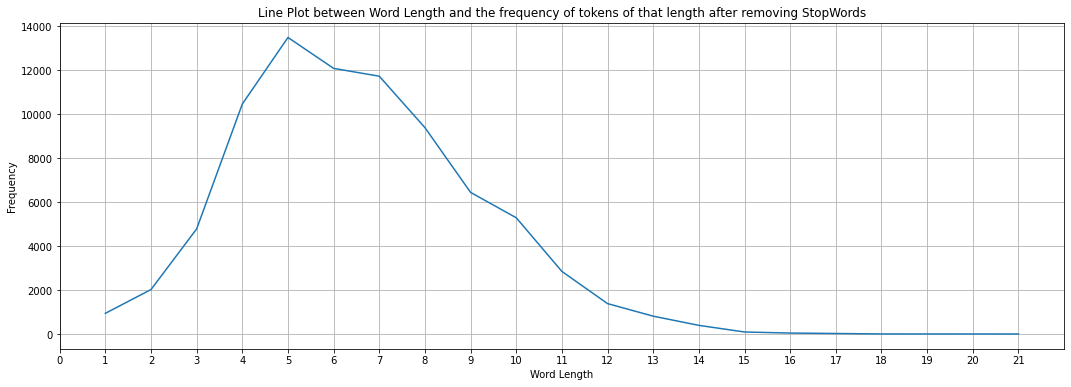

In [64]:
#Plot between Word Length and the frequency of tokens of that length after removing StopWords
plt.figure(figsize=(18,6))
plt.title("Line Plot between Word Length and the frequency of tokens of that length after removing StopWords")
plt.plot(len_df_a['Length_Tokens'],len_df_a['Frequency'])
plt.xticks(np.linspace(0,21,22))
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [65]:
dic_a = dict(nltk.FreqDist(tokens))
df_a = pd.DataFrame(list(dic_a.items()))
df_a.rename(columns = {0:'Tokens', 1:'Frequency'}, inplace = True)
df_a = df_a.sort_values('Frequency',ascending=False)
df_a

,Tokens,Frequency
1082,state,1355
235,input,1315
285,circuit,1130
230,output,1044
2,binary,893
...,...,...
2781,bz,1
2780,adderc,1
2777,circui,1
2775,andor,1


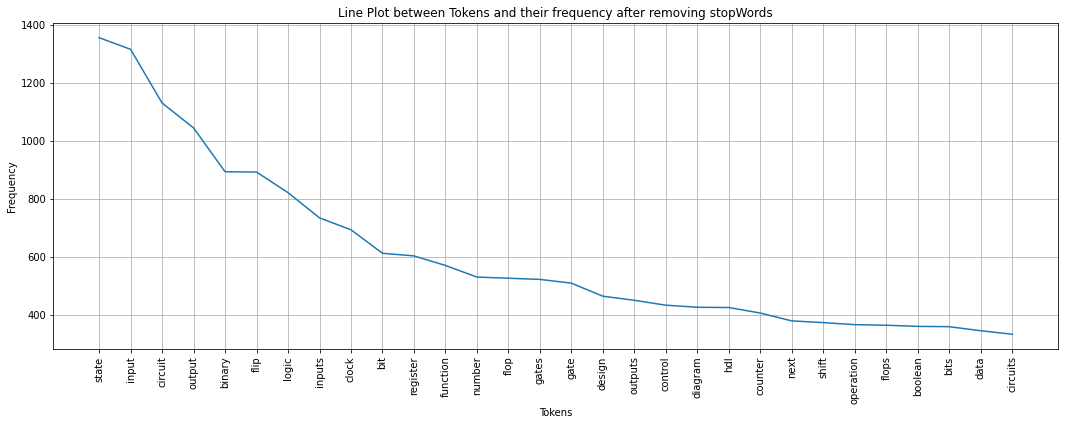

In [66]:
plt.figure(figsize=(18,6))
plt.title("Line Plot between Tokens and their frequency after removing stopWords")
plt.plot(df_a['Tokens'].iloc[:30],df_a['Frequency'].iloc[:30])
plt.xticks(rotation=90)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.grid()
plt.show()

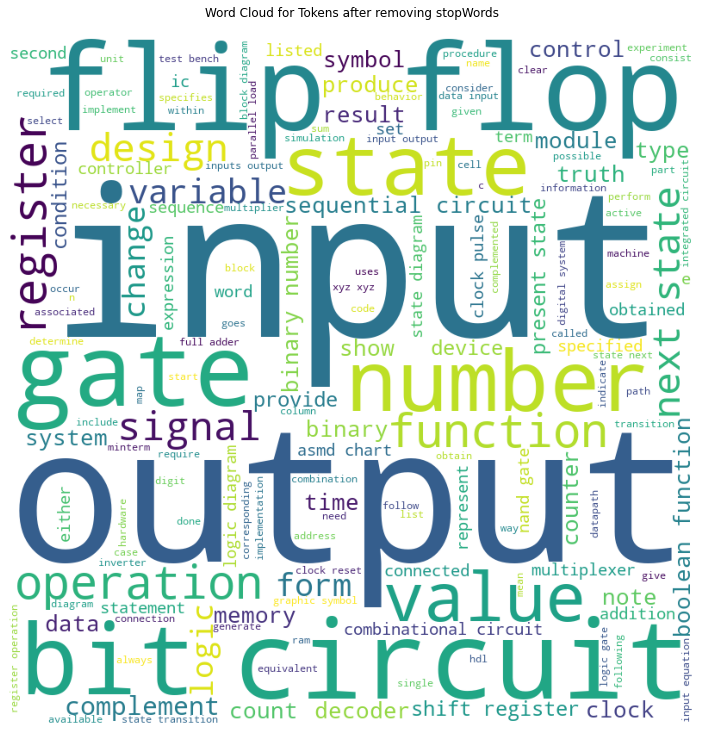

In [67]:
#Creating WordCloud after Removing StopWords
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', stopwords={},
                min_font_size = 10).generate(stop_words_removed_txt)

plt.figure(figsize = (10, 10), facecolor = None)
plt.title("Word Cloud for Tokens after removing stopWords\n")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [68]:
#Performing POS Tagging using Penn Treebank Tagset
tagged = nltk.pos_tag(tokens)
tagged[:50]

[('digital', 'JJ'),
 ('systems', 'NNS'),
 ('binary', 'JJ'),
 ('numbers', 'NNS'),
 ('digital', 'JJ'),
 ('systems', 'NNS'),
 ('digital', 'JJ'),
 ('systems', 'NNS'),
 ('prominent', 'JJ'),
 ('role', 'NN'),
 ('everyday', 'JJ'),
 ('life', 'NN'),
 ('refer', 'VBP'),
 ('present', 'JJ'),
 ('technological', 'JJ'),
 ('period', 'NN'),
 ('digital', 'JJ'),
 ('age', 'NN'),
 ('digital', 'JJ'),
 ('systems', 'NNS'),
 ('communication', 'NN'),
 ('business', 'NN'),
 ('transactions', 'NNS'),
 ('traffic', 'NN'),
 ('control', 'NN'),
 ('spacecraft', 'NN'),
 ('guidance', 'NN'),
 ('medical', 'JJ'),
 ('treatment', 'NN'),
 ('weather', 'NN'),
 ('monitoring', 'VBG'),
 ('internet', 'JJ'),
 ('many', 'JJ'),
 ('commercial', 'JJ'),
 ('industrial', 'JJ'),
 ('scientific', 'JJ'),
 ('enterprises', 'NNS'),
 ('digital', 'JJ'),
 ('telephones', 'NNS'),
 ('digital', 'JJ'),
 ('televisions', 'NNS'),
 ('digital', 'VBP'),
 ('versatile', 'JJ'),
 ('discs', 'NN'),
 ('digital', 'JJ'),
 ('cameras', 'NNS'),
 ('handheld', 'VBD'),
 ('devices'

In [69]:
dic_tag = dict(nltk.FreqDist([tag for (word,tag) in tagged]))
tag_df = pd.DataFrame(list(dic_tag.items()))
tag_df.rename(columns = {0:'Tags', 1:'Frequency'}, inplace = True)
tag_df = tag_df.sort_values('Frequency',ascending=False)
tag_df

,Tags,Frequency
2,NN,33907
0,JJ,16971
1,NNS,11029
3,VBP,4758
5,VBD,3076
6,VBN,2702
9,VBZ,2247
11,RB,2194
4,VBG,2058
7,VB,842


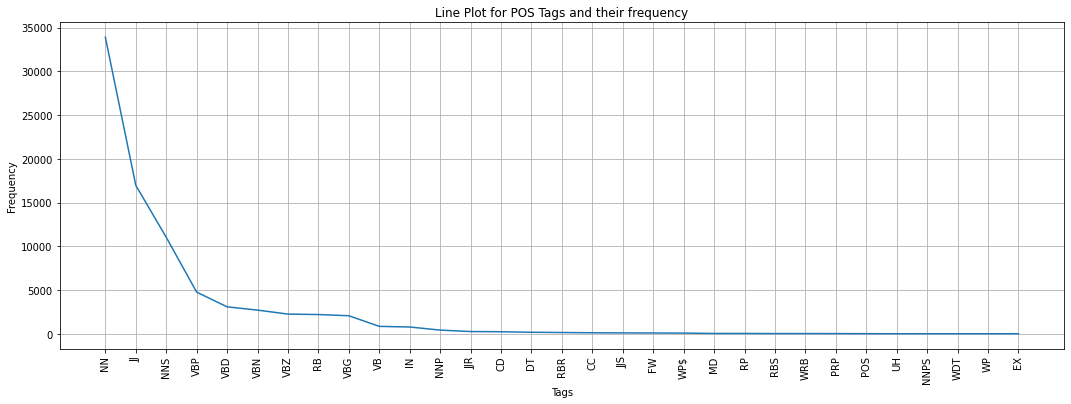

In [70]:
plt.figure(figsize=(18,6))
plt.title("Line Plot for POS Tags and their frequency")
plt.plot(tag_df['Tags'],tag_df['Frequency'])
plt.xticks(rotation=90)
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# **Project Round-2**


---



In [71]:
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')

noun_count = 0
nouns={}
verb_count = 0
verbs={}

for i in tokens:
  try:
    tag = wordnet.synsets(i)[0]
    if tag.pos() == 'n':
      noun_count += 1
      lex_n = tag.lexname()
      lex_n = lex_n[5:]
      if lex_n not in nouns.keys():
        nouns[lex_n] = [i]
      else:
        nouns[lex_n].append(i)
    elif tag.pos() == 'v':
      verb_count += 1
      lex_v = tag.lexname()
      lex_v = lex_v[5:]
      if lex_v not in verbs.keys():
        verbs[lex_v] = [i]
      else:
        verbs[lex_v].append(i)
  except:
    temp = 1

noun_count, verb_count

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(59091, 11068)

In [72]:
noun_cat_freq = pd.DataFrame({k:len(v) for k,v in nouns.items()}.items())
verb_cat_freq = pd.DataFrame({k:len(v) for k,v in verbs.items()}.items())


noun_cat_freq.rename(columns = {0:'Categories', 1:'Frequency'}, inplace = True)
noun_cat_freq = noun_cat_freq.sort_values('Frequency',ascending=False)

verb_cat_freq.rename(columns = {0:'Categories', 1:'Frequency'}, inplace = True)
verb_cat_freq = verb_cat_freq.sort_values('Frequency',ascending=False)

# noun_cat_freq
verb_cat_freq

,Categories,Frequency
0,communication,2289
3,change,1591
6,stative,1518
10,cognition,1428
9,creation,1063
4,social,908
2,possession,749
7,contact,630
5,perception,361
8,motion,284


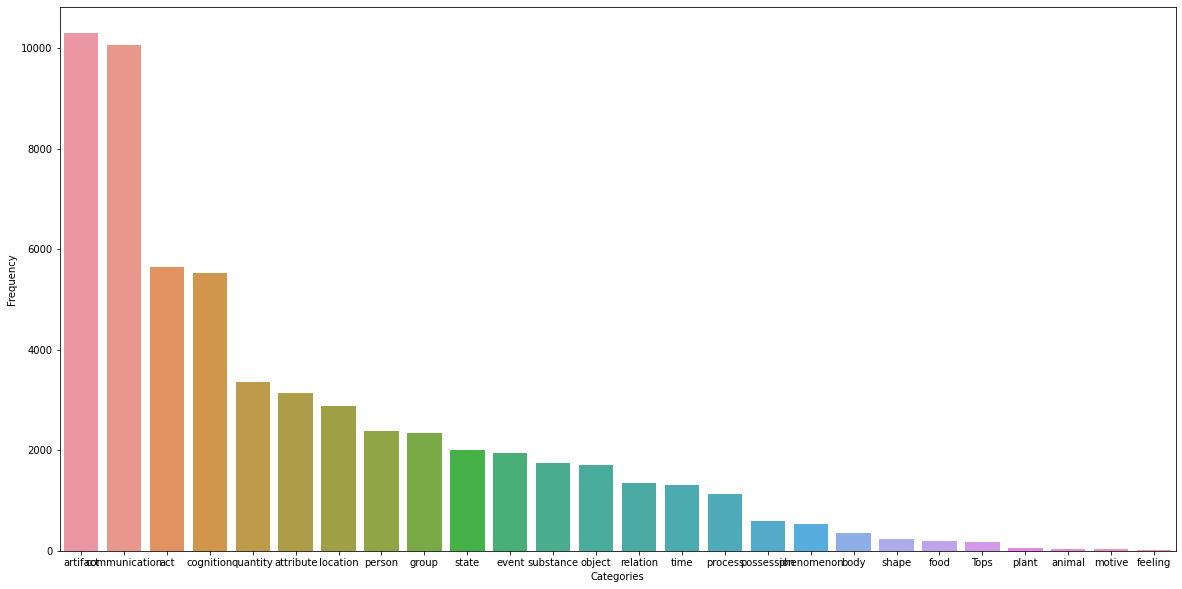

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x= 'Categories',y='Frequency', data=noun_cat_freq)
# sns.barplot(x= 'Categories',y='Frequency', data=verb_cat_freq)
plt.show()

In [74]:
import spacy
from spacy import displacy
from collections import Counter
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
nlp = spacy.load('en_core_web_sm')

In [75]:
ner = nlp.get_pipe("ner")
ner.add_label("PER")
ner.add_label("ORG")
ner.add_label("LOC")
ner.add_label("GPE")
ner.add_label("FAC")
ner.add_label("VEH")

1

In [76]:
book_text = nlp(clean_txt[:10000])
entity = [X.text for X in book_text.ents]
y_pred = [X.label_ for X in book_text.ents]

y_pred

['ORG',
 'CARDINAL',
 'CARDINAL',
 'CARDINAL',
 'CARDINAL',
 'CARDINAL',
 'DATE',
 'CARDINAL',
 'ORDINAL',
 'ORDINAL',
 'CARDINAL',
 'PRODUCT',
 'CARDINAL',
 'CARDINAL',
 'CARDINAL',
 'CARDINAL']

In [77]:
print([(X, X.ent_iob_, X.ent_type_)for X in book_text][900:1010])

[(can, 'O', ''), (be, 'O', ''), (bought, 'O', ''), (at, 'O', ''), (an, 'O', ''), (increasingly, 'O', ''), (reduced, 'O', ''), (price, 'O', ''), (equipment, 'O', ''), (built, 'O', ''), (with, 'O', ''), (digital, 'O', ''), (integrated, 'O', ''), (circuits, 'O', ''), (can, 'O', ''), (perform, 'O', ''), (at, 'O', ''), (speed, 'O', ''), (of, 'O', ''), (hundreds, 'B', 'CARDINAL'), (of, 'I', 'CARDINAL'), (millions, 'I', 'CARDINAL'), (of, 'O', ''), (operations, 'O', ''), (per, 'O', ''), (second, 'B', 'ORDINAL'), (digital, 'O', ''), (systems, 'O', ''), (can, 'O', ''), (be, 'O', ''), (made, 'O', ''), (to, 'O', ''), (operate, 'O', ''), (with, 'O', ''), (extreme, 'O', ''), (reliability, 'O', ''), (by, 'O', ''), (using, 'O', ''), (error, 'O', ''), (correcting, 'O', ''), (codes, 'O', ''), (an, 'O', ''), (example, 'O', ''), (of, 'O', ''), (this, 'O', ''), (strategy, 'O', ''), (is, 'O', ''), (the, 'O', ''), (digital, 'O', ''), (versatile, 'O', ''), (disk, 'O', ''), (dvd, 'O', ''), (in, 'O', ''), (whic

In [78]:
labels = [X.label_ for X in book_text.ents]
Counter(labels)

Counter({'ORG': 1, 'CARDINAL': 11, 'DATE': 1, 'ORDINAL': 2, 'PRODUCT': 1})

In [79]:
displacy.render((book_text), jupyter = True, style = 'ent')

In [80]:
# # Manually label the entities
# y_true = []
# for x in entity:
#     entity_label = input(f"Label for entity '{x}': ")
#     y_true.append(entity_label)

# print(y_true)

In [81]:
y_true = ['PRODUCT',
          'CARDINAL',
          'CARDINAL',
          'CARDINAL',
          'CARDINAL',
          'CARDINAL',
          'DATE',
          'CARDINAL',
          'ORDINAL',
          'ORDINAL',
          'CARDINAL',
          '',
          'CARDINAL',
          'CARDINAL',
          'CARDINAL',
          'CARDINAL']


In [82]:
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {accuracy:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.875
F1 Score: 0.500


## Part-3

In [83]:
#Considering only the a small set

In [84]:
def bag_of_words(entity):
  neigh = []
  try:
      for i in range(-3,0):
        neigh.append(entity[0].nbor(i))  # text of token before the entity
  except:
      pass
  try:
      for i in range(1,4):
        neigh.append(entity[-1].nbor(i))  # text of token after the entity
  except:
      pass
  return neigh

In [85]:
table = []
for i in book_text.ents:
  for j in book_text.ents:
    if i.start < j.start:
      row = []
      row.append(i.text)
      row.append(j.text)
      row.append(i.label_)
      row.append(j.label_)
      row.append(bag_of_words(i))
      row.append(bag_of_words(j))
      table.append(row)

In [86]:
table = pd.DataFrame(table,columns=['Entity1','Entity2','Label_E1','Label_E2','BOW_E1','BOW_E2'])
table

,Entity1,Entity2,Label_E1,Label_E2,BOW_E1,BOW_E2
0,digital systems,one,ORG,CARDINAL,"[and, binary, numbers]","[spectrum, of, applications, characteristic, o..."
1,digital systems,two,ORG,CARDINAL,"[and, binary, numbers]","[systems, use, just, discrete, values, and]"
2,digital systems,two,ORG,CARDINAL,"[and, binary, numbers]","[called, bit, has, values, and, discrete]"
3,digital systems,four,ORG,CARDINAL,"[and, binary, numbers]","[with, code, of, bits, g, the]"
4,digital systems,one hundred eleven,ORG,CARDINAL,"[and, binary, numbers]","[same, as, or, the, subscript, indicating]"
...,...,...,...,...,...,...
115,two,the thousands hundreds,CARDINAL,CARDINAL,"[stored, in, binary, valued, storage, elements]","[tens, plus, units, etc, are, powers]"
116,two,only two,CARDINAL,CARDINAL,"[stored, in, binary, valued, storage, elements]","[number, system, have, possible, values, and]"
117,thousands plus hundreds,the thousands hundreds,CARDINAL,CARDINAL,"[quantity, equal, to, plus, tens, plus]","[tens, plus, units, etc, are, powers]"
118,thousands plus hundreds,only two,CARDINAL,CARDINAL,"[quantity, equal, to, plus, tens, plus]","[number, system, have, possible, values, and]"


In [87]:
dict_feat = {}
for ent1 in book_text.ents:
    for ent2 in book_text.ents:
      ent1_text = ent1.text
      ent2_text = ent2.text
      if (ent1_text,ent2_text) not in dict_feat.keys():
        dict_feat[(ent1_text,ent2_text)] = []
                  
      if ent1.start < ent2.start:
        # Extract the dependency parse tree of the sentence containing the entities
        sentence = book_text[ent1.sent.start:ent2.sent.end]
        dependencies = []
        for token in sentence:
          dependencies.append({
              "text": token.text,
              "dep": token.dep_,
              "head": token.head.text,
              "pos": token.pos_
          })
        dependency_tree = {"root": dependencies}

        # Extract the contextual features
        context = book_text[ent1.end:ent2.start]
        context_words = [token.text for token in context]
        context_length = len(context_words)

        # Extract the entity distances
        ent1_index = ent1[0].i
        ent2_index = ent2[0].i
        entity_distance = abs(ent1_index - ent2_index)

        # Extract the part-of-speech tags and dependency labels
        pos_tags = []
        dependency_labels = []
        for token in context:
          pos_tags.append(token.pos_)
          dependency_labels.append(token.dep_)

        dict_feat[(ent1_text,ent2_text)].append(dependency_tree)
        dict_feat[(ent1_text,ent2_text)].append(context_words)
        dict_feat[(ent1_text,ent2_text)].append(context_length)
        dict_feat[(ent1_text,ent2_text)].append(entity_distance)
        dict_feat[(ent1_text,ent2_text)].append(pos_tags)
        dict_feat[(ent1_text,ent2_text)].append(dependency_labels)

In [88]:
table['dependency_tree'] = [dict_feat[(e1,e2)][0] for e1,e2 in zip(table['Entity1'],table['Entity2']) if dict_feat[(e1,e2)] != []]
table['context_words'] = [dict_feat[(e1,e2)][1] for e1,e2 in zip(table['Entity1'],table['Entity2']) if dict_feat[(e1,e2)] != []]
table['context_length'] = [dict_feat[(e1,e2)][2] for e1,e2 in zip(table['Entity1'],table['Entity2']) if dict_feat[(e1,e2)] != []]
table['entity_distance'] = [dict_feat[(e1,e2)][3] for e1,e2 in zip(table['Entity1'],table['Entity2']) if dict_feat[(e1,e2)] != []]
table['pos_tags'] = [dict_feat[(e1,e2)][4] for e1,e2 in zip(table['Entity1'],table['Entity2']) if dict_feat[(e1,e2)] != []]
table['dependency_labels'] = [dict_feat[(e1,e2)][5] for e1,e2 in zip(table['Entity1'],table['Entity2']) if dict_feat[(e1,e2)] != []]
table

,Entity1,Entity2,Label_E1,Label_E2,BOW_E1,BOW_E2,dependency_tree,context_words,context_length,entity_distance,pos_tags,dependency_labels
0,digital systems,one,ORG,CARDINAL,"[and, binary, numbers]","[spectrum, of, applications, characteristic, o...","{'root': [{'text': 'digital', 'dep': 'amod', '...","[and, binary, numbers, digital, systems, digit...",201,203,"[CCONJ, ADJ, NOUN, PROPN, PROPN, PROPN, NOUN, ...","[cc, amod, conj, compound, nmod, compound, con..."
1,digital systems,two,ORG,CARDINAL,"[and, binary, numbers]","[systems, use, just, discrete, values, and]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[and, binary, numbers, digital, systems, digit...",324,326,"[CCONJ, ADJ, NOUN, PROPN, PROPN, PROPN, NOUN, ...","[cc, amod, conj, compound, nmod, compound, con..."
2,digital systems,two,ORG,CARDINAL,"[and, binary, numbers]","[called, bit, has, values, and, discrete]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[and, binary, numbers, digital, systems, digit...",324,326,"[CCONJ, ADJ, NOUN, PROPN, PROPN, PROPN, NOUN, ...","[cc, amod, conj, compound, nmod, compound, con..."
3,digital systems,four,ORG,CARDINAL,"[and, binary, numbers]","[with, code, of, bits, g, the]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[and, binary, numbers, digital, systems, digit...",369,371,"[CCONJ, ADJ, NOUN, PROPN, PROPN, PROPN, NOUN, ...","[cc, amod, conj, compound, nmod, compound, con..."
4,digital systems,one hundred eleven,ORG,CARDINAL,"[and, binary, numbers]","[same, as, or, the, subscript, indicating]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[and, binary, numbers, digital, systems, digit...",430,432,"[CCONJ, ADJ, NOUN, PROPN, PROPN, PROPN, NOUN, ...","[cc, amod, conj, compound, nmod, compound, con..."
...,...,...,...,...,...,...,...,...,...,...,...,...
115,two,the thousands hundreds,CARDINAL,CARDINAL,"[stored, in, binary, valued, storage, elements]","[tens, plus, units, etc, are, powers]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[discrete, values, and, are, therefore, said, ...",1026,1027,"[ADJ, NOUN, CCONJ, AUX, ADV, VERB, PART, AUX, ...","[amod, dobj, cc, auxpass, advmod, conj, aux, x..."
116,two,only two,CARDINAL,CARDINAL,"[stored, in, binary, valued, storage, elements]","[number, system, have, possible, values, and]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[discrete, values, and, are, therefore, said, ...",1173,1174,"[ADJ, NOUN, CCONJ, AUX, ADV, VERB, PART, AUX, ...","[amod, dobj, cc, auxpass, advmod, conj, aux, x..."
117,thousands plus hundreds,the thousands hundreds,CARDINAL,CARDINAL,"[quantity, equal, to, plus, tens, plus]","[tens, plus, units, etc, are, powers]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[plus, tens, plus, units]",4,7,"[CCONJ, NOUN, CCONJ, NOUN]","[cc, conj, cc, conj]"
118,thousands plus hundreds,only two,CARDINAL,CARDINAL,"[quantity, equal, to, plus, tens, plus]","[number, system, have, possible, values, and]","{'root': [{'text': 'digital', 'dep': 'amod', '...","[plus, tens, plus, units, the, thousands, hund...",151,154,"[CCONJ, NOUN, CCONJ, NOUN, DET, NOUN, NOUN, X,...","[cc, conj, cc, conj, det, compound, dobj, amod..."
